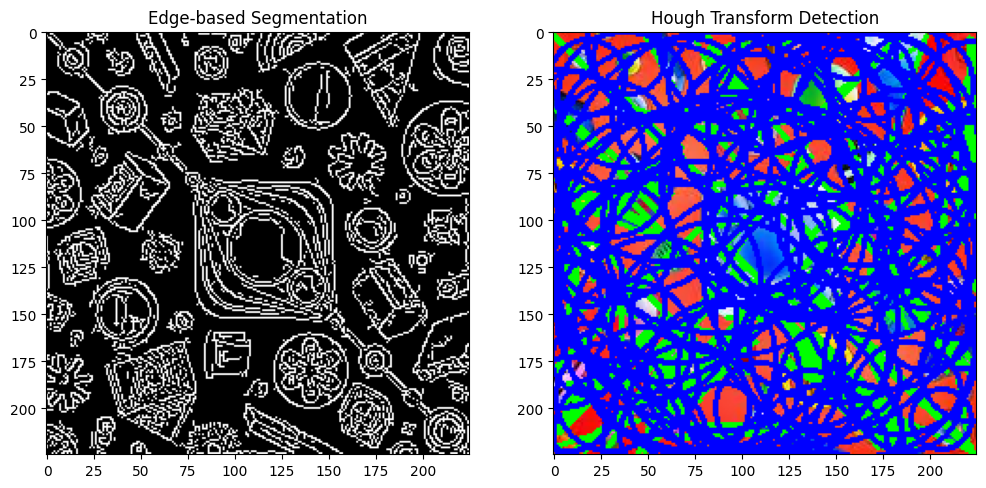

In [ ]:
#E22CSEU0164 PRATHAM PAHWA



import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/images.jpeg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray, 50, 150)

_, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 50, minLineLength=50, maxLineGap=10)
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=10, maxRadius=100)
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(image, (i[0], i[1]), i[2], (255, 0, 0), 2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1), plt.imshow(edges, cmap='gray'), plt.title("Edge-based Segmentation")
plt.subplot(1, 2, 2), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title("Hough Transform Detection")
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.2/922.2 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 57.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

100%|██████████| 6.25M/6.25M [00:00<00:00, 49.9MB/s]



0: 640x640 1 mouse, 1 book, 1 clock, 369.2ms
Speed: 15.2ms preprocess, 369.2ms inference, 21.8ms postprocess per image at shape (1, 3, 640, 640)


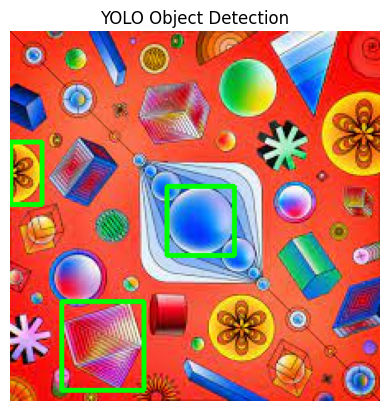

In [ ]:
!pip install ultralytics
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
model = YOLO("yolov8n.pt")
image_path = "/content/images.jpeg"
image = cv2.imread(image_path)
results = model(image)
for result in results:
    if hasattr(result, 'boxes'):
        for box in result.boxes.xyxy.cpu().numpy():
            x1, y1, x2, y2 = map(int, box[:4])
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("YOLO Object Detection")
plt.axis("off")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


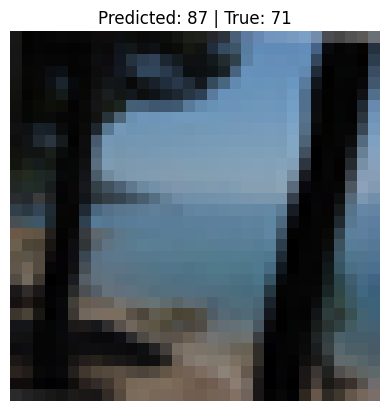

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = keras.utils.to_categorical(y_train, 100)
y_test = keras.utils.to_categorical(y_test, 100)
base_model = MobileNetV2(weights=None, include_top=False, input_shape=(32, 32, 3))
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(512, activation='relu')(x)
output = Dense(100, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
batch_size = 32
indices = np.random.choice(len(x_train), batch_size, replace=False)
x_batch, y_batch = x_train[indices], y_train[indices]
model.train_on_batch(x_batch, y_batch)

image = x_test[10]
true_label = np.argmax(y_test[10])
pred = model.predict(image.reshape(1, 32, 32, 3))
pred_class = pred.argmax()
plt.imshow(image)
plt.title(f"Predicted: {pred_class} | True: {true_label}")
plt.axis("off")
plt.show()
